# <font color= orange>**zika virus dataset basic analysis , dataset provided by cdc**</font>

# AIM

The aim of the research is to extract patterns from the dataset to find out the flow of spread of the virus in the north & south american continents


## What is Zika virus ?




Zika virus is an infection transmitted mostly by the Aedes species mosquito (Ae. aegypti and Ae. albopictus), has been sweeping across the Americas and the Pacific since mid-2015. 

## Symptoms



As many as 4 out of 5 people infected with the Zika virus have no signs or symptoms. When symptoms do occur, they usually begin two to seven days after a person is bitten by an **infected mosquito**. Signs and symptoms of the Zika virus most commonly include: Mild fever , Rash ,Joint or muscle pain



# About the dataset


The dataset includes the following fields:
1. **Report_date**
2. **location** -  country name along with state/city/province name 
3. **location_type**-  defined type of location whether it is state, city, province or municipality
4. **Data_field** - short description of what data is represented i.e. whether it is a confirmed case, under study case, microcephaly case etc.
5. **Data_field_code**- it contains country code followed by type of data
6. **Time_period** -if the data pertains to a specific period of time, for example an epidemiological week, that number should be indicated here 
7. **time_period_type** - Required only if 'time_period' is specified. Types will also     be specified in the country data guide. Otherwise should be NA.
8. **Value** - number or value of the data
9. **Unit** -  defines that value depicts the number of cases reported



# Below is the code
### P.S. - important piece of code is marked with red text

# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# importing the dataset

In [2]:
zika_df = pd.read_csv('cdc_zika.csv',low_memory=False)

# preprocessing

In [3]:
keep_rows = np.logical_and(pd.notnull(zika_df['report_date']),pd.notnull(zika_df['value'])) 
zika_df = zika_df[keep_rows]
print('Removed {:d} out of {:d} rows with missing report_date or missing value.'.format(len(keep_rows) - sum(keep_rows),
                                                                                        len(keep_rows)))


Removed 138 out of 107619 rows with missing report_date or missing value.


# changing the date format and sorting it according to dates

In [4]:
zika_df['report_date'] = pd.to_datetime([d.replace('_', '-') for d in zika_df['report_date']],format='%Y-%m-%d')
zika_df.sort_values(by='report_date', inplace=True, kind='mergesort')

In [5]:
zika_df.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
99706,2015-11-28,El_Salvador-Ahuachapan,department,cumulative_suspected_total,SV0010,NaN,NaN,4,cases
99707,2015-11-28,El_Salvador-Cabanas,department,cumulative_suspected_total,SV0010,NaN,NaN,3,cases
99708,2015-11-28,El_Salvador-Chalatenango,department,cumulative_suspected_total,SV0010,NaN,NaN,8,cases
99709,2015-11-28,El_Salvador-Cuscatlan,department,cumulative_suspected_total,SV0010,NaN,NaN,4,cases
99710,2015-11-28,El_Salvador-La_Libertad,department,cumulative_suspected_total,SV0010,NaN,NaN,61,cases


In [6]:
zika_df = zika_df[zika_df['unit'] == 'cases']
sorted(set(zika_df['value']))
zika_df['value'] = pd.to_numeric(zika_df['value'], 'coerce')

# showing all the locations present

In [7]:
countries = [s[0] for s in zika_df['location'].str.split('-')]
zika_country_grouped = zika_df.groupby(countries)
for name, group in zika_country_grouped:
    print(name)
    print(group['location'].unique())
    #print (zika_df[cases])


Argentina
['Argentina-Buenos_Aires' 'Argentina-CABA' 'Argentina-Catamarca'
 'Argentina-Chaco' 'Argentina-Chubut' 'Argentina-Cordoba'
 'Argentina-Corrientes' 'Argentina-Entre_Rios' 'Argentina-Formosa'
 'Argentina-Jujuy' 'Argentina-La_Pampa' 'Argentina-La_Rioja'
 'Argentina-Mendoza' 'Argentina-Misiones' 'Argentina-Neuquen'
 'Argentina-Rio_Negro' 'Argentina-Salta' 'Argentina-San_Juan'
 'Argentina-San_Luis' 'Argentina-Santa_Cruz' 'Argentina-Santa_Fe'
 'Argentina-Sgo_Del_Estero' 'Argentina-Tierra_del_Fuego'
 'Argentina-Tucuman' 'Argentina-Tierra_Del_Fuego']
Brazil
['Brazil-Acre' 'Brazil-Alagoas' 'Brazil-Bahia' 'Brazil-Ceara'
 'Brazil-Distrito_Federal' 'Brazil-Espirito_Santo' 'Brazil-Goias'
 'Brazil-Maranhao' 'Brazil-Mato_Grosso' 'Brazil-Mato_Grosso_do_Sul'
 'Brazil-Minas_Gerais' 'Brazil-Para' 'Brazil-Paraiba' 'Brazil-Parana'
 'Brazil-Pernambuco' 'Brazil-Piaui' 'Brazil-Rio_Grande_do_Norte'
 'Brazil-Rio_Grande_do_Sul' 'Brazil-Rio_de_Janeiro' 'Brazil-Rondonia'
 'Brazil-Roraima' 'Brazil-Santa_C

In [8]:
#data_categories = sorted(country_df['data_field'].unique())
#print(os.linesep.join(data_categories))

## showing all the columns

In [9]:
zika_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106476 entries, 99706 to 6072
Data columns (total 9 columns):
report_date         106476 non-null datetime64[ns]
location            106476 non-null object
location_type       106476 non-null object
data_field          106476 non-null object
data_field_code     106476 non-null object
time_period         0 non-null float64
time_period_type    0 non-null float64
value               106473 non-null float64
unit                106476 non-null object
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 8.1+ MB


In [10]:
zika_df['location'].head()

99706      El_Salvador-Ahuachapan
99707         El_Salvador-Cabanas
99708    El_Salvador-Chalatenango
99709       El_Salvador-Cuscatlan
99710     El_Salvador-La_Libertad
Name: location, dtype: object

# <font color='red'> name of columns </font>

In [11]:
zika_df.columns.tolist()

['report_date',
 'location',
 'location_type',
 'data_field',
 'data_field_code',
 'time_period',
 'time_period_type',
 'value',
 'unit']

## <font color ='red'> showing all the countries</font>

In [12]:
zika_df['country'] = zika_df['location']
zika_df['country'] = zika_df['country'].astype(str)
zika_df['country'] = zika_df['country'].apply(lambda x: pd.Series(x.split('-')))
zika_df.country.unique()

array(['El_Salvador', 'Mexico', 'Guatemala', 'Colombia',
       'Dominican_Republic', 'United_States', 'Puerto_Rico', 'Haiti',
       'Nicaragua', 'Brazil', 'United_States_Virgin_Islands', 'Argentina',
       'Ecuador', 'Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro', 'Panama'], dtype=object)

In [13]:
zika_df.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit,country
99706,2015-11-28,El_Salvador-Ahuachapan,department,cumulative_suspected_total,SV0010,NaN,NaN,4.0,cases,El_Salvador
99707,2015-11-28,El_Salvador-Cabanas,department,cumulative_suspected_total,SV0010,NaN,NaN,3.0,cases,El_Salvador
99708,2015-11-28,El_Salvador-Chalatenango,department,cumulative_suspected_total,SV0010,NaN,NaN,8.0,cases,El_Salvador
99709,2015-11-28,El_Salvador-Cuscatlan,department,cumulative_suspected_total,SV0010,NaN,NaN,4.0,cases,El_Salvador
99710,2015-11-28,El_Salvador-La_Libertad,department,cumulative_suspected_total,SV0010,NaN,NaN,61.0,cases,El_Salvador


## dropping unnecessary columns

In [14]:
zika_df = zika_df.drop(['location_type', 'data_field_code', 'time_period_type', 'time_period', 'unit'], axis=1)


In [15]:
zika_df.head()

,report_date,location,data_field,value,country
99706,2015-11-28,El_Salvador-Ahuachapan,cumulative_suspected_total,4.0,El_Salvador
99707,2015-11-28,El_Salvador-Cabanas,cumulative_suspected_total,3.0,El_Salvador
99708,2015-11-28,El_Salvador-Chalatenango,cumulative_suspected_total,8.0,El_Salvador
99709,2015-11-28,El_Salvador-Cuscatlan,cumulative_suspected_total,4.0,El_Salvador
99710,2015-11-28,El_Salvador-La_Libertad,cumulative_suspected_total,61.0,El_Salvador


### adding the state/city column

In [16]:
foo = lambda x: pd.Series([i for i in reversed(x.split('-'))])
zika_df['location'] = zika_df.location.apply(foo)
zika_df.rename(columns={'location':'state_city'}, inplace=True)

In [17]:
zika_df.state_city = zika_df.state_city.map(lambda x: x.replace('_',' '))
zika_df.head()

,report_date,state_city,data_field,value,country
99706,2015-11-28,Ahuachapan,cumulative_suspected_total,4.0,El_Salvador
99707,2015-11-28,Cabanas,cumulative_suspected_total,3.0,El_Salvador
99708,2015-11-28,Chalatenango,cumulative_suspected_total,8.0,El_Salvador
99709,2015-11-28,Cuscatlan,cumulative_suspected_total,4.0,El_Salvador
99710,2015-11-28,La Libertad,cumulative_suspected_total,61.0,El_Salvador


# <font color='red' > showing number of reports per country </font>

In [18]:
print (zika_df.country.value_counts())


Colombia                        86887
Dominican_Republic               5716
Brazil                           3130
Mexico                           2880
United_States                    2453
Argentina                        2016
El_Salvador                       990
Ecuador                           796
United_States_Virgin_Islands      509
Guatemala                         479
Puerto_Rico                       260
Panama                            148
Nicaragua                         125
Haiti                              52
Sudeste                             7
Nordeste                            7
Norte                               7
Centro                              7
Sul                                 7
Name: country, dtype: int64


## <font color='red'> GRAPH </font>

Text(0.5,1,'number of reports per country')

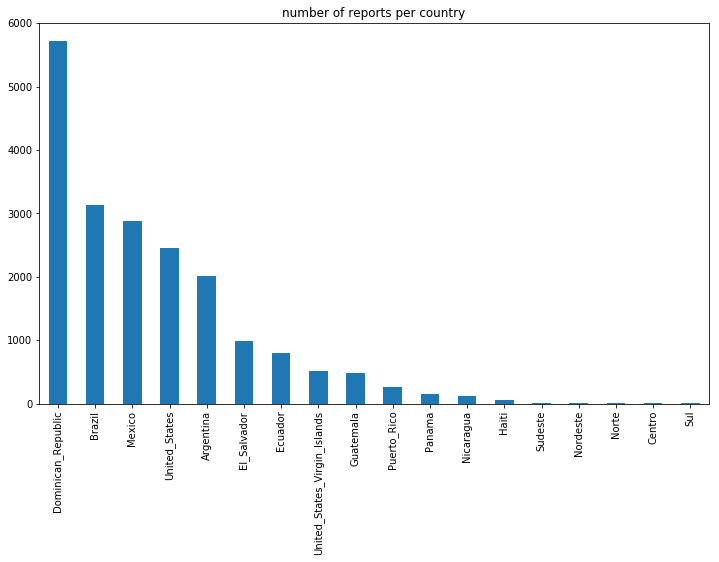

In [19]:
%matplotlib inline
zika_df.country.value_counts()[1:].plot(kind='bar', figsize=(12, 7))

plt.title("number of reports per country")

In [20]:
def order(frame,var):
    varlist =[w for w in frame.columns if w not in var]
    frame = frame[var+varlist]
    return frame

zika_df = order(zika_df,['report_date','country', 'state_city', 'value'])

## <font color=red>number of cases per city plot</font>

Text(0.5,1,'number of locations reported per state / city')

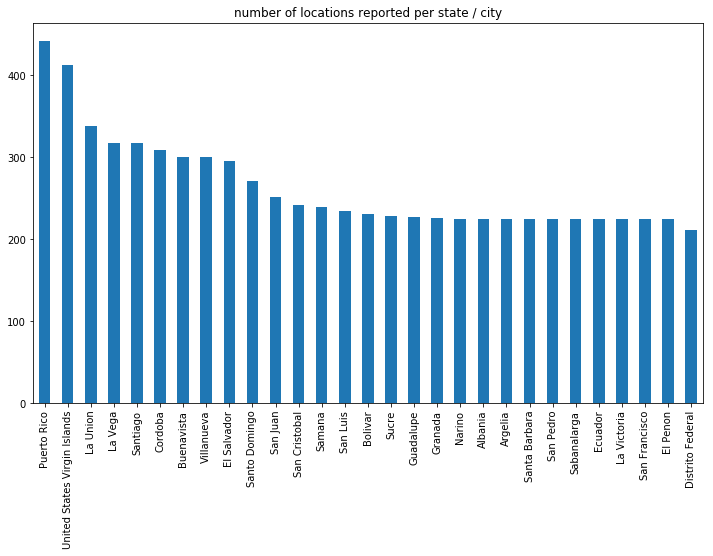

In [21]:
%matplotlib inline
zika_df.state_city.value_counts()[1:30].plot(kind='bar', figsize=(12, 7))

plt.title("number of locations reported per state / city")

## list of all cities

In [22]:
zika_df.state_city.tolist()

['Ahuachapan',
 'Cabanas',
 'Chalatenango',
 'Cuscatlan',
 'La Libertad',
 'La Paz',
 'La Union',
 'Morazan',
 'San Miguel',
 'San Salvador',
 'San Vicente',
 'Santa Ana',
 'Sonsonate',
 'Usulutan',
 'El Salvador',
 'La Libertad',
 'San Salvador',
 'El Salvador',
 'Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Chiapas',
 'Chihuahua',
 'Coahuila de Zaragoza',
 'Colima',
 'Distrito Federal',
 'Durango',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'Mexico',
 'Michoacan de Ocampo',
 'Morelos',
 'Nayarit',
 'Nuevo Leon',
 'Oaxaca',
 'Puebla',
 'Queretaro de Arteaga',
 'Quintana Roo',
 'San Luis Potosi',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz de Ignacio de la Llave',
 'Yucatan',
 'Zacatecas',
 'Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Chiapas',
 'Chihuahua',
 'Coahuila de Zaragoza',
 'Colima',
 'Distrito Federal',
 'Durango',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'Mexic

In [23]:
zika_df.head()

,report_date,country,state_city,value,data_field
99706,2015-11-28,El_Salvador,Ahuachapan,4.0,cumulative_suspected_total
99707,2015-11-28,El_Salvador,Cabanas,3.0,cumulative_suspected_total
99708,2015-11-28,El_Salvador,Chalatenango,8.0,cumulative_suspected_total
99709,2015-11-28,El_Salvador,Cuscatlan,4.0,cumulative_suspected_total
99710,2015-11-28,El_Salvador,La Libertad,61.0,cumulative_suspected_total


## <font color= red> final processed dataset</font>

In [24]:
zika_df.set_index('report_date')

,country,state_city,value,data_field
report_date,,,,
2015-11-28,El_Salvador,Ahuachapan,4.0,cumulative_suspected_total
2015-11-28,El_Salvador,Cabanas,3.0,cumulative_suspected_total
2015-11-28,El_Salvador,Chalatenango,8.0,cumulative_suspected_total
2015-11-28,El_Salvador,Cuscatlan,4.0,cumulative_suspected_total
2015-11-28,El_Salvador,La Libertad,61.0,cumulative_suspected_total
2015-11-28,El_Salvador,La Paz,1.0,cumulative_suspected_total
2015-11-28,El_Salvador,La Union,4.0,cumulative_suspected_total
2015-11-28,El_Salvador,Morazan,4.0,cumulative_suspected_total
2015-11-28,El_Salvador,San Miguel,16.0,cumulative_suspected_total


## <font color = red> number of cases in brazil</font>

In [25]:
brazil=zika_df[zika_df.country=='Brazil']
print (brazil.value.sum())

2005036.0


## <font color = red> number of cases in colombia</font>

In [26]:
colombia = zika_df[zika_df.country == 'Colombia']
print(colombia.value.sum())

1536401.0


## <font color = red> number of cases in dominican republic</font>

In [27]:
dominican = zika_df[zika_df.country == 'Dominican_Republic']
print(dominican.value.sum())

94983.0


## <font color = red> start date</font>

In [28]:
zika_df.report_date.min()

Timestamp('2015-11-28 00:00:00')

## <font color = red> end date</font>

In [29]:
zika_df.report_date.max()

Timestamp('2016-07-02 00:00:00')

## code ends here

# Facts about the dataset


1. It contains data of **19 countries/islands** situated in north and south **america** continent
2. Dataset contains weekly reports starting from **november 2015 to july 2016** (varied for every location).
3. Dataset contains reports in accordance to the states/city/province.
4. **Colombia and brazil (microcephaly)** are among the countries showing maximum number of cases. 
5. **April** has maximum number of reporting of cases.



# Factors affecting the spread 


As zika virus is caused by water breeding mosquito therefore its spread is environment dependent. 
1. **Rainfall , humidity , high temperature increases the breeding of the virus causing mosquito**
2. **Sanitation facility and water supply**
3. **Demographic deforestation**
 
 Zika dataset link - https://www.kaggle.com/cdc/zika-virus-epidemic
